# Google Store App Rating Prediction

## CONTEXT:
The Play Store apps data has enormous potential to drive app-making businesses to success. However, manyappsare being developed every single day and only a few of them become profitable. It is important for developers tobeable to predict the success of their app and incorporate features which makes an app successful. We can collect appdata and user ratings from the app stores and use it to extract insightful information. A machine learning model canbeused to predict rating for a given app, which can be used to estimate success and scope of improvement

## PROJECT OBJECTIVE:
The Goal is to predict the rating for an app based on the given input features like size, number of downloads etc. 

## DATA DESCRIPTION: 
- Web scraped data of 10k Play Store apps for analyzing the Android market. 
- Each app(row) has values for category, rating, size, and more.

## ATTRIBUTE INFORMATION:
1. App: Application name
2. Category: Category the app belongs to
3. Rating: Overall user rating of the app
4. Reviews: Number of user reviews for the app
5. Size: Size of the app
6. Installs: Number of user downloads/installs for the app
7. Type: Paid or Free
8. Price: Price of the app
9. Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
10.Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical familygamewill belong to Music, Game, Family genres. 11.Last Updated: Date when the app was last updated on Play Store
12.Current Ver: Current version of the app available on Play Store
13.Android Ver: Min required Android version

## Step 1: Importing libraries and reading dataset 

In [4]:
# Importing required libraries
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading dataset 
df = pd.read_csv('Apps_data.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.shape

(10841, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


- We have 13 columns and 10841 instances which seems quite less for the number of columns we have
- All the columns are non-numeric except 'Rating' column which is our target column
- We observe few missing values in some columns but rating column has the most

## Step2: Data Cleansing and EDA

### 2.1 Summary stats 

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


- From above table we can observe that the rating feature is highly left skewed

<AxesSubplot:xlabel='Rating', ylabel='Density'>

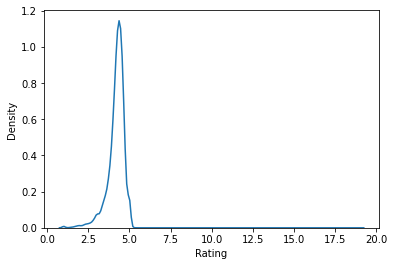

In [10]:
sns.kdeplot(df.Rating) # we can observe the heavy skewnes from kde plot as well

In [11]:
df.describe(include='O').transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


- There seem many duplicates in App column
- There are 34 unique categories of apps which shows a diverse dataset
- Reviews, Size, Installs and Price columns should be int type. We need to work on it
- From Type column we see most of the apps are free with very few charged ones. We also see 3 categories which might indicate null values 
- Content Rating shows most of the columns target all type of customers

### 2.2 Duplicates handeling

In [12]:
df.duplicated('App').sum()

1181

In [13]:
df = df.drop_duplicates(subset='App')

In [14]:
df.shape

(9660, 13)

### 2.3 Unique categories of column 'Category'

In [15]:
df['Category'].unique() 

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
df[df['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df = df[~(df['Category'] == '1.9')]
df.shape

(9659, 13)

### 2.4 'Rating' column missing values handeling and categorising it

In [18]:
df['Rating'].count()

8196

In [19]:
df = df[df['Rating'].notna()]
df.shape

(8196, 13)

In [20]:
df['Rating_category'] = np.where(df['Rating']> 3.5, 'high', 'low')

In [21]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,high
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,high
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,high
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,high
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up,high
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,high
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,high
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,high


### 2.5 Distribution of 'Rating_category' col:

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

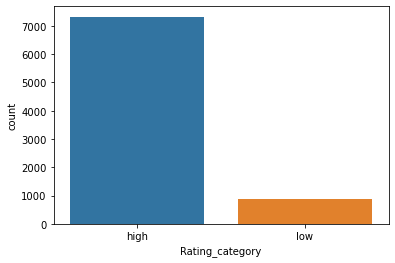

In [22]:
sns.countplot(x='Rating_category', data=df)

From above distribution of 'Rating_category' we can clearly see that there is huge imbalance in data according to high and low rated app categories

### 2.6 'Reviews' column datatype to numeric

In [23]:
df['Reviews'] = df['Reviews'].astype('int')
df['Reviews'].dtype

dtype('int32')

<AxesSubplot:xlabel='Reviews'>

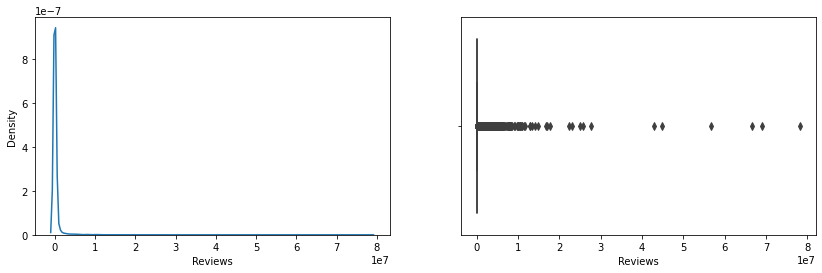

In [24]:
# Outliers in 'Reviews' col
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(df.Reviews)
plt.subplot(1,2,2)
sns.boxplot(x=df['Reviews'])

We can see large number of outliers in the column

In [25]:
df['Reviews_log'] = np.log(df['Reviews'])

<AxesSubplot:xlabel='Reviews_log'>

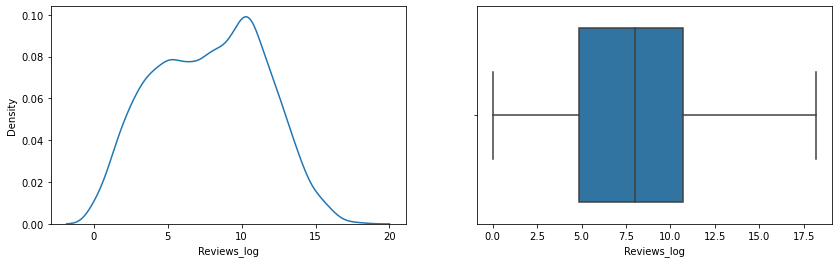

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
sns.kdeplot(df.Reviews_log)
plt.subplot(1,2,2)
sns.boxplot(x=df['Reviews_log'])

- We checked various Gaussian transformation techniques(log, exponential, sq root, reciprocal) and found log transformation most apt.
- Log transformed data is much more near normal distribution as compared to original data

### 2.7 'Size' column: Handeling alphanumeric values

In [27]:
df['Size'] = df['Size'].str.replace('M', '000000')

In [28]:
df['Size'] = df['Size'].str.replace('k', '000')

In [29]:
df.shape

(8196, 15)

In [30]:
# Dropping 'Varies with device' values of 'Size' col 
df = df[~(df['Size']=='Varies with device')]

In [31]:
df.shape

(7027, 15)

In [32]:
df['Size'] = df['Size'].astype('float')

In [33]:
df['Size'].dtype

dtype('float64')

### 2.8 'Installs' column: Handeling unwanted characters

In [34]:
df['Installs'] = df['Installs'].str.replace('+', '')

In [35]:
df['Installs'] = df['Installs'].str.replace(',', '')

In [36]:
df['Installs'] = df['Installs'].astype('int')

In [37]:
df['Installs'].dtype

dtype('int32')

### 2.9 'Price' column: Handeling unwanted characters

In [38]:
df['Price'] = df['Price'].str.replace('$', '')

In [39]:
df['Price'] = df['Price'].astype('float')

In [40]:
df['Price'].dtype

dtype('float64')

## Step 3: Data Preparation for model building:

### 3.1 Dropping redundant columns

In [41]:
df.drop(['App', 'Rating', 'Last Updated', 'Current Ver', 'Android Ver', 'Reviews', 'Type'], axis=1, inplace=True)

In [42]:
df

,Category,Size,Installs,Price,Content Rating,Genres,Rating_category,Reviews_log
0,ART_AND_DESIGN,19000000.0,10000,0.0,Everyone,Art & Design,high,5.068904
1,ART_AND_DESIGN,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,high,6.874198
2,ART_AND_DESIGN,8.7,5000000,0.0,Everyone,Art & Design,high,11.379508
3,ART_AND_DESIGN,25000000.0,50000000,0.0,Teen,Art & Design,high,12.281384
4,ART_AND_DESIGN,2.8,100000,0.0,Everyone,Art & Design;Creativity,high,6.874198
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,619000.0,1000,0.0,Everyone,Books & Reference,high,3.784190
10834,FAMILY,2.6,500,0.0,Everyone,Education,high,1.945910
10836,FAMILY,53000000.0,5000,0.0,Everyone,Education,high,3.637586
10837,FAMILY,3.6,100,0.0,Everyone,Education,high,1.386294


### 3.2 'Rating' column:  0 and 1

In [43]:
# Target Column
df['Rating_category'] = df['Rating_category'].str.replace('high', '1')
df['Rating_category'] = df['Rating_category'].str.replace('low', '0')

In [44]:
df

,Category,Size,Installs,Price,Content Rating,Genres,Rating_category,Reviews_log
0,ART_AND_DESIGN,19000000.0,10000,0.0,Everyone,Art & Design,1,5.068904
1,ART_AND_DESIGN,14000000.0,500000,0.0,Everyone,Art & Design;Pretend Play,1,6.874198
2,ART_AND_DESIGN,8.7,5000000,0.0,Everyone,Art & Design,1,11.379508
3,ART_AND_DESIGN,25000000.0,50000000,0.0,Teen,Art & Design,1,12.281384
4,ART_AND_DESIGN,2.8,100000,0.0,Everyone,Art & Design;Creativity,1,6.874198
...,...,...,...,...,...,...,...,...
10833,BOOKS_AND_REFERENCE,619000.0,1000,0.0,Everyone,Books & Reference,1,3.784190
10834,FAMILY,2.6,500,0.0,Everyone,Education,1,1.945910
10836,FAMILY,53000000.0,5000,0.0,Everyone,Education,1,3.637586
10837,FAMILY,3.6,100,0.0,Everyone,Education,1,1.386294


### 3.3 Encoding categorical columns

In [45]:
# We will be label encoding all categorical variables
le = preprocessing.LabelEncoder()
df_encoded = df.copy()

In [46]:
# 'Category' column
df_encoded['Category'] = le.fit_transform(df_encoded['Category'])
le_Category_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # Label encoder mapping of 'Category' column
le_Category_mapping

{'ART_AND_DESIGN': 0,
 'AUTO_AND_VEHICLES': 1,
 'BEAUTY': 2,
 'BOOKS_AND_REFERENCE': 3,
 'BUSINESS': 4,
 'COMICS': 5,
 'COMMUNICATION': 6,
 'DATING': 7,
 'EDUCATION': 8,
 'ENTERTAINMENT': 9,
 'EVENTS': 10,
 'FAMILY': 11,
 'FINANCE': 12,
 'FOOD_AND_DRINK': 13,
 'GAME': 14,
 'HEALTH_AND_FITNESS': 15,
 'HOUSE_AND_HOME': 16,
 'LIBRARIES_AND_DEMO': 17,
 'LIFESTYLE': 18,
 'MAPS_AND_NAVIGATION': 19,
 'MEDICAL': 20,
 'NEWS_AND_MAGAZINES': 21,
 'PARENTING': 22,
 'PERSONALIZATION': 23,
 'PHOTOGRAPHY': 24,
 'PRODUCTIVITY': 25,
 'SHOPPING': 26,
 'SOCIAL': 27,
 'SPORTS': 28,
 'TOOLS': 29,
 'TRAVEL_AND_LOCAL': 30,
 'VIDEO_PLAYERS': 31,
 'WEATHER': 32}

In [47]:
# 'Content Rating'
df_encoded['Content Rating'] = le.fit_transform(df_encoded['Content Rating'])
le_ContentRating_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # Label encoder mapping of 'Content Rating' column
le_ContentRating_mapping

{'Adults only 18+': 0,
 'Everyone': 1,
 'Everyone 10+': 2,
 'Mature 17+': 3,
 'Teen': 4,
 'Unrated': 5}

In [48]:
# 'Genres'
df_encoded['Genres'] = le.fit_transform(df_encoded['Genres'])
le_Genres_mapping = dict(zip(le.classes_, le.transform(le.classes_))) # Label encoder mapping of 'Genres' column
le_Genres_mapping

{'Action': 0,
 'Action;Action & Adventure': 1,
 'Adventure': 2,
 'Adventure;Action & Adventure': 3,
 'Adventure;Brain Games': 4,
 'Adventure;Education': 5,
 'Arcade': 6,
 'Arcade;Action & Adventure': 7,
 'Arcade;Pretend Play': 8,
 'Art & Design': 9,
 'Art & Design;Creativity': 10,
 'Art & Design;Pretend Play': 11,
 'Auto & Vehicles': 12,
 'Beauty': 13,
 'Board': 14,
 'Board;Action & Adventure': 15,
 'Board;Brain Games': 16,
 'Board;Pretend Play': 17,
 'Books & Reference': 18,
 'Books & Reference;Education': 19,
 'Business': 20,
 'Card': 21,
 'Card;Action & Adventure': 22,
 'Casino': 23,
 'Casual': 24,
 'Casual;Action & Adventure': 25,
 'Casual;Brain Games': 26,
 'Casual;Creativity': 27,
 'Casual;Education': 28,
 'Casual;Music & Video': 29,
 'Casual;Pretend Play': 30,
 'Comics': 31,
 'Comics;Creativity': 32,
 'Communication': 33,
 'Dating': 34,
 'Education': 35,
 'Education;Action & Adventure': 36,
 'Education;Brain Games': 37,
 'Education;Creativity': 38,
 'Education;Education': 39,
 '

In [49]:
df_encoded

,Category,Size,Installs,Price,Content Rating,Genres,Rating_category,Reviews_log
0,0,19000000.0,10000,0.0,1,9,1,5.068904
1,0,14000000.0,500000,0.0,1,11,1,6.874198
2,0,8.7,5000000,0.0,1,9,1,11.379508
3,0,25000000.0,50000000,0.0,4,9,1,12.281384
4,0,2.8,100000,0.0,1,10,1,6.874198
...,...,...,...,...,...,...,...,...
10833,3,619000.0,1000,0.0,1,18,1,3.784190
10834,11,2.6,500,0.0,1,35,1,1.945910
10836,11,53000000.0,5000,0.0,1,35,1,3.637586
10837,11,3.6,100,0.0,1,35,1,1.386294


In [50]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7027 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Category         7027 non-null   int32  
 1   Size             7027 non-null   float64
 2   Installs         7027 non-null   int32  
 3   Price            7027 non-null   float64
 4   Content Rating   7027 non-null   int32  
 5   Genres           7027 non-null   int32  
 6   Rating_category  7027 non-null   object 
 7   Reviews_log      7027 non-null   float64
dtypes: float64(3), int32(4), object(1)
memory usage: 384.3+ KB


### 3.4 Separating target and predictor variables

In [51]:
X = df_encoded.drop('Rating_category', axis=1)

In [52]:
y = df_encoded.pop('Rating_category')

In [53]:
y.shape

(7027,)

In [54]:
X.shape

(7027, 7)

### 3.5 Train - Test split

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

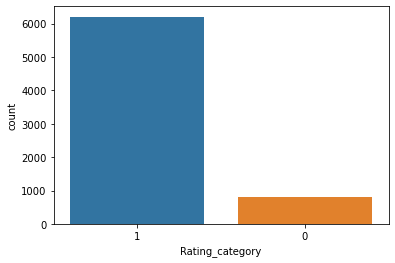

In [55]:
sns.countplot(x='Rating_category', data=df)

In [56]:
# Due to imbalance in classes we'll use stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44, stratify=y) 

We can see from below figures that y_train and y_test are maintaining the same ration of classes as in original y :

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

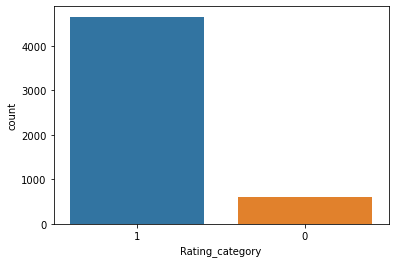

In [57]:
sns.countplot(x=y_train, data=y_train)

<AxesSubplot:xlabel='Rating_category', ylabel='count'>

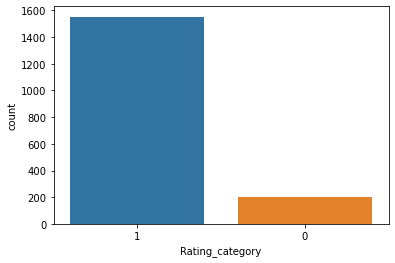

In [58]:
sns.countplot(x=y_test, data=y_test)

### 3.6 Data Standardization

In [59]:
X_train_z = X_train.apply(zscore)
X_test_z = X_test.apply(zscore)

In [60]:
X_train_z

,Category,Size,Installs,Price,Content Rating,Genres,Reviews_log
4362,0.152511,0.266086,-0.211341,20.456097,-0.454972,0.093211,-0.216770
10220,1.250009,-0.814973,-0.206645,-0.066875,2.523539,1.109448,0.508810
2271,0.396399,-0.814973,-0.211837,0.086538,-0.454972,0.188483,-1.862631
2837,0.884176,-0.108127,0.309921,-0.066875,-0.454972,0.506057,1.002569
9890,-0.701098,1.887675,-0.211811,-0.066875,-0.454972,-0.573694,-0.672122
...,...,...,...,...,...,...,...
3396,0.762232,0.307665,-0.185774,-0.066875,-0.454972,0.474300,0.573127
4035,-0.335265,-0.232865,0.309921,-0.066875,1.530702,-1.907504,1.962675
7918,-0.579154,-0.814973,-0.209254,-0.066875,-0.454972,-0.129090,-0.211368
9587,-0.335265,1.097670,0.049029,-0.066875,-0.454972,-1.716960,1.344166


## Step 4: Model training and testing:

### 4.1 Function to fit and print model predictions

Since our target variable has a huge imbalance in classes, so we would have to observe confusion matrix and precision and recall scores instead of just the accuracy for model evaluation!

In [77]:
def predict_model (model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    print('Train accuracy = ', model.score(X_train, y_train))  # performance on train data
    print('Test accuracy = ', model.score(X_test, y_test))  # performance on test data
    y_pred = model.predict(X_test)
    print('Confusion Matrix: \n', metrics.confusion_matrix(y_test, y_pred))
    print('Classification Report: \n',metrics.classification_report(y_test, y_pred))

### 4.2 Training various models

#### 4.2.1 Decision tree classifier

In [78]:
dec_tree = DecisionTreeClassifier(criterion = 'entropy')

In [79]:
predict_model(dec_tree, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.9977229601518026
Test accuracy =  0.7797381900967558
Confusion Matrix: 
 [[  52  153]
 [ 234 1318]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.18      0.25      0.21       205
           1       0.90      0.85      0.87      1552

    accuracy                           0.78      1757
   macro avg       0.54      0.55      0.54      1757
weighted avg       0.81      0.78      0.79      1757



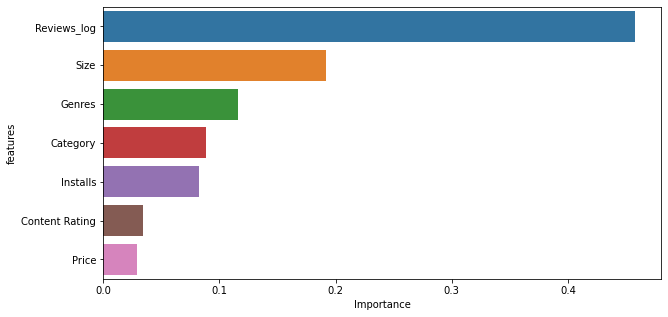

In [91]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': dec_tree.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

#### 4.2.2 Random Forest

In [80]:
rf = RandomForestClassifier()

In [81]:
predict_model(rf, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.9908918406072106
Test accuracy =  0.8725099601593626
Confusion Matrix: 
 [[   1  204]
 [  20 1532]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.05      0.00      0.01       205
           1       0.88      0.99      0.93      1552

    accuracy                           0.87      1757
   macro avg       0.47      0.50      0.47      1757
weighted avg       0.79      0.87      0.82      1757



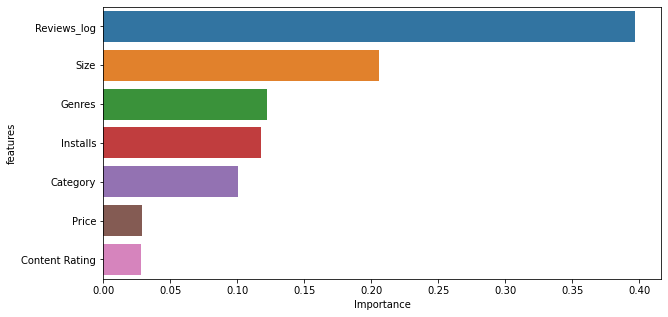

In [92]:
feature_importances = pd.DataFrame({'features': X_train.columns, 'Importance': rf.feature_importances_})

feature_importances = feature_importances.sort_values('Importance',ascending=False).reset_index(drop=True)


plt.figure(figsize=(10,5))
sns.barplot(x='Importance',y='features',data=feature_importances)
plt.show()

#### 4.2.3 Bagging using Decision tree estimator

In [82]:
bgcl = BaggingClassifier(n_estimators=50, max_samples=0.8 , oob_score=True)
# default base_estimator is decision tree

In [83]:
predict_model(bgcl, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.9929791271347248
Test accuracy =  0.8571428571428571
Confusion Matrix: 
 [[  22  183]
 [  68 1484]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.24      0.11      0.15       205
           1       0.89      0.96      0.92      1552

    accuracy                           0.86      1757
   macro avg       0.57      0.53      0.54      1757
weighted avg       0.81      0.86      0.83      1757



#### 4.2.4 Boosting

#### a) Ada Boost Classifier

In [84]:
ada = AdaBoostClassifier(base_estimator=dec_tree, random_state=10, learning_rate=0.1)

In [85]:
predict_model(ada, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.9977229601518026
Test accuracy =  0.796812749003984
Confusion Matrix: 
 [[  33  172]
 [ 185 1367]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.15      0.16      0.16       205
           1       0.89      0.88      0.88      1552

    accuracy                           0.80      1757
   macro avg       0.52      0.52      0.52      1757
weighted avg       0.80      0.80      0.80      1757



#### b) Gradient Boost Classifier

In [86]:
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, random_state=2)


In [87]:
predict_model(gbcl, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.8842504743833017
Test accuracy =  0.8793397837222539
Confusion Matrix: 
 [[  11  194]
 [  18 1534]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.38      0.05      0.09       205
           1       0.89      0.99      0.94      1552

    accuracy                           0.88      1757
   macro avg       0.63      0.52      0.51      1757
weighted avg       0.83      0.88      0.84      1757



#### 4.2.5 Stacked classifier using decision tree, logistic regression, AdaboostClassifier with final estimator as random forest

In [88]:
sc = StackingClassifier(estimators=[('rf', rf), ('gbcl', gbcl)], final_estimator= LogisticRegression())
sc

StackingClassifier(estimators=[('rf', RandomForestClassifier()),
                               ('gbcl',
                                GradientBoostingClassifier(learning_rate=0.09,
                                                           n_estimators=50,
                                                           random_state=2))],
                   final_estimator=LogisticRegression())

In [89]:
predict_model(sc, X_train_z, y_train, X_test_z, y_test)

Train accuracy =  0.9055028462998103
Test accuracy =  0.8736482640865111
Confusion Matrix: 
 [[   7  198]
 [  24 1528]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.23      0.03      0.06       205
           1       0.89      0.98      0.93      1552

    accuracy                           0.87      1757
   macro avg       0.56      0.51      0.50      1757
weighted avg       0.81      0.87      0.83      1757



## Step 5: Conclusion and improvisation

- From the accuracy of all models except gradient boost and stacking classifier, we can see that train accuracy is very high as compared to test accuracy which clearly shows overfitting.
- Also, observing the confusion matrix of all models, we see very poor precision score for the undersampled class(ie. very low TP and high FP)

Comparing model performances:
- Decision tree has performed most poorly, showing both overfitting as well as poor test performance
  (Perf. can be improved using optimal tuning methods)
- Random forest and Bagging models show better test accuracies as compared to decision tree but still show overfitting.
- Boosting models:
  Gradient boosting performed better than ada boost as it is able to avoid overfitting ie. it performs equally in train and       test sets although the problem of poor scores for undersampled class persists.
- Stacking classifier shows similar test performance as random forest but is able to reduce overfitting to an extent.

Improvisation for better model performances:
- To avoid overfitting, we can use hyperparameter tuning of the models.
  eg: providing max_depth in decision tree model
- We can also employ various feature engineering techniques to select best features which will help avoid overfitting! 
- For improving scores of the class having less samples, we can use oversampling methods like SMOTE or RandomOversampler for balancing the classes.

### Conclusion:
- Decision Tree, Random Forest and Bagging models show overfitting.
- The **best performing model** is **Gradient Boost** having 88% accuracy without overfitting.
- **Number of Reviews** and **Size of the app** contribute the most in predicting rating of an app followed by **Genre**, **Number of downloads** and **Category** 
- **Future Improvisation** - Although most models are able to predict with an accuarcy of above 80%, the dataset is highly imbalanced and therefore we need to balance the class in order to improve the precision for minority class. (accuracy will be baised towards majority class)